<a href="https://colab.research.google.com/github/tarutear/2025-1/blob/main/Introduction_to_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to R
## 패키지 불러오기

In [1]:
## 데이터 전처리를 위한 패키지
library(dplyr)

## 데이터 분석 및 시각화를 위한 패키지
library(tidyverse)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.2     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


패키지가 컴퓨터에 설치되어 있지 않을 때에는 install.packages("패키지명")을 통해 설치 후 library(패키지)

In [2]:
library(corrplot)

ERROR: Error in library(corrplot): there is no package called ‘corrplot’


In [ ]:
install.packages("corrplot")
library(corrplot)

## 변수

변수 이름 규칙
1. 변수명은 알파벳, 숫자, _(언더스코어), .(마침표)로 구성되며, -(하이픈)은 사용할 수 없다.
2. 첫 글자는 알파벳 또는 .으로 시작해야 한다. 만약.으로 시작한다면 . 뒤에는 숫자가 올 수 없다.
 <br> ex) .x (O) / .2 (x)


 변수값을 할당할 때에는 <- 를 활용 <br>
  x <- 3

In [ ]:
## 올바른 예

x <- 3
.x <- 3

## 잘못된 예
.2 <- 3
2 <- 3

## 스칼라

스칼라란 단일 차원의 값을 뜻하는 것으로 숫자 1,2,3, …을 예로 들 수 있다.

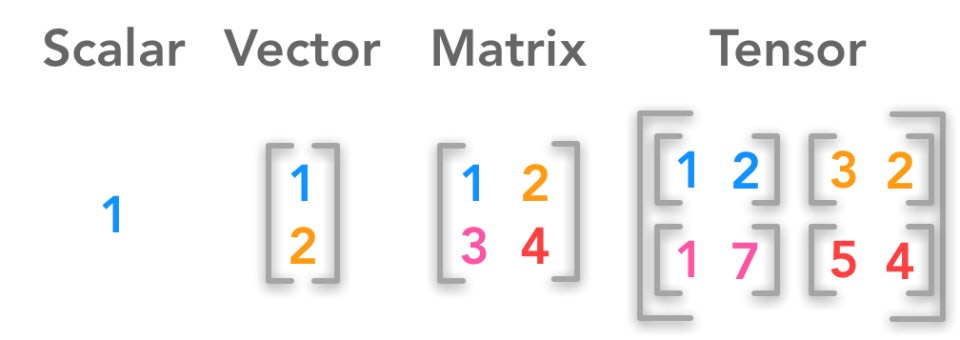

R의 기본형은 벡터이므로, 스칼라자료는 길이가 1인 벡터

In [ ]:
a <- 3
b <- 4.5
c <- a+b
print(c)

## NA
만약 데이터에 값이 존재하지 않는다면 NA로 표시할 수 있다.

In [ ]:
one <- 100
two <- 75
three <- 80
four <- NA

is.na(four)

In [ ]:
T <- tibble(index = 1:4, score = c(100,75,80,NA))
print(T)
is.na(T)

# 결측치 처리

In [2]:
install.packages("NHANES")
library(NHANES)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
head(NHANES)

In [3]:
nhanes <- NHANES %>% mutate(missing_phys_active = is.na(PhysActive))

In [4]:
missing_male <- nhanes %>% filter(Gender == "male") %>% pull(missing_phys_active)
missing_female <- nhanes %>% filter(Gender == "female") %>% pull(missing_phys_active)

In [5]:
t.test(missing_male, missing_female)


	Welch Two Sample t-test

data:  missing_male and missing_female
t = 1.7328, df = 9982.9, p-value = 0.08316
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.001697928  0.027576742
sample estimates:
mean of x mean of y 
0.1738956 0.1609562 


In [6]:
install.packages("naniar")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘plyr’, ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’




In [11]:
install.packages("VIM")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘zoo’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘DEoptimR’, ‘lmtest’, ‘proxy’, ‘RcppEigen’, ‘colorspace’, ‘car’, ‘robustbase’, ‘sp’, ‘vcd’, ‘e1071’, ‘laeken’, ‘ranger’




In [12]:
library(naniar)
library(VIM)

Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep




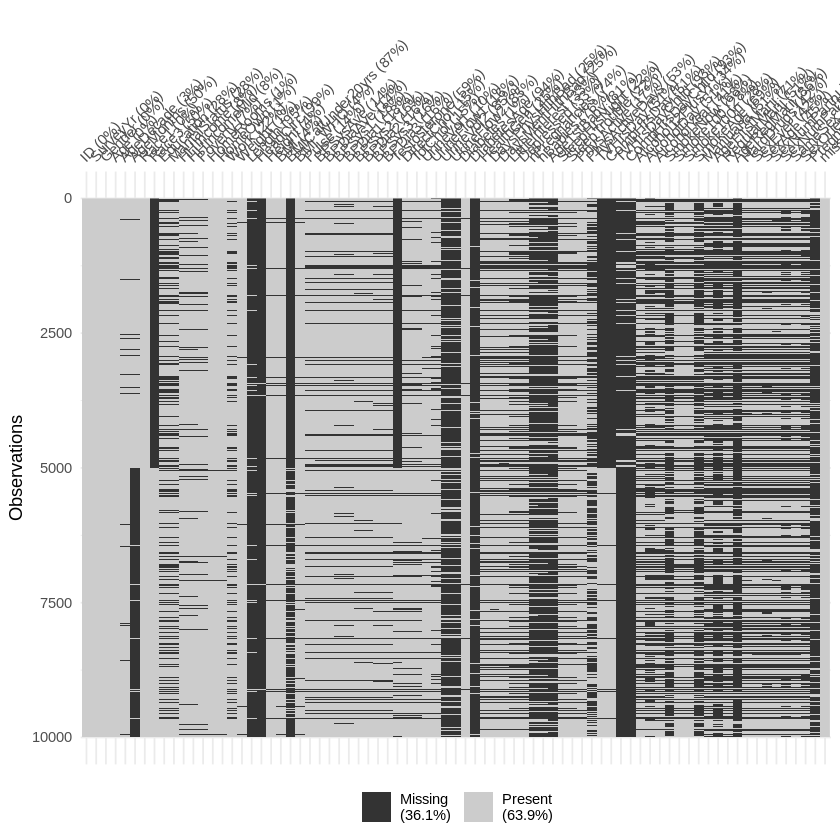

In [8]:
nhanes %>% vis_miss()

In [38]:
nhanes_imp <- nhanes %>% mutate(height_imp = ifelse(is.na(Height), TRUE, FALSE)) %>%
  mutate(weight_imp = ifelse(is.na(Weight), TRUE, FALSE)) %>%
  mutate(height = ifelse(is.na(height_imp), mean(Height, na.rm = TRUE), Height)) %>%
  mutate(weight = ifelse(is.na(weight_imp), mean(Weight, na.rm = TRUE), Weight)) %>%
  select(weight, height, height_imp, weight_imp)

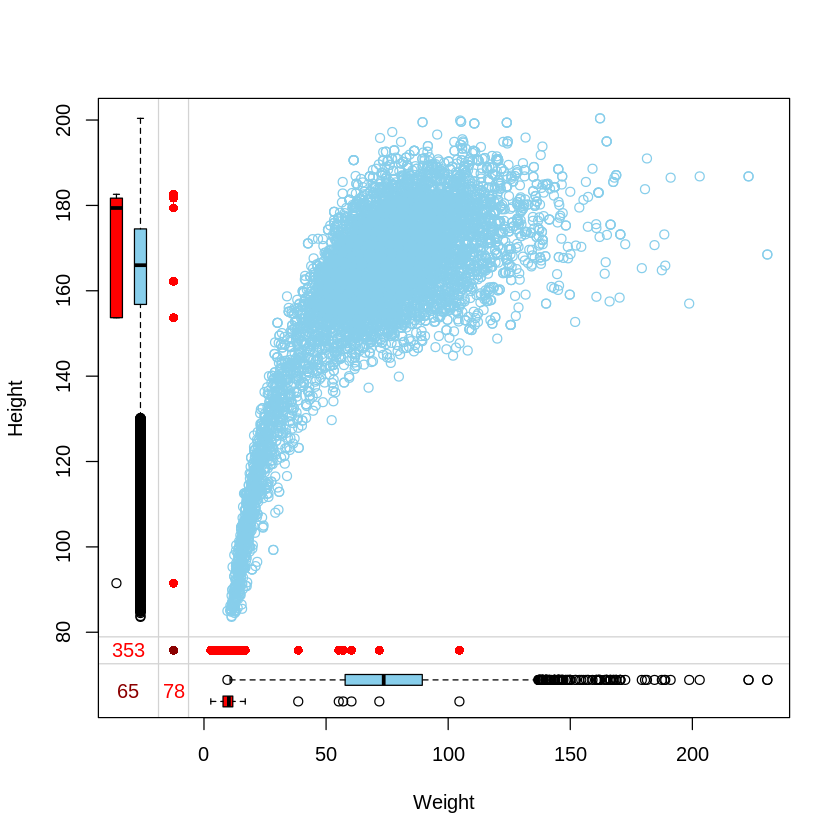

In [43]:
nhanes %>% select(Weight, Height) %>% marginplot()